<a href="https://colab.research.google.com/github/Lutris98/21_1Q/blob/master/1.Titanic/TitanicV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.EDA

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.metrics import accuracy_score 

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')
train_df=pd.read_csv('/content/gdrive/MyDrive/Dataset/titanic_train.csv')
test_df=pd.read_csv('/content/gdrive/MyDrive/Dataset/titanic_test.csv')
df=pd.concat([train_df,test_df],axis=0) #test data needs imputation

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##1) Basic statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


##2)Basic feature engineering

In [ ]:
df['Name']=df['Name'].str.extract('([A-Za-z]+)\.')
df['Name'].replace(['Rev','Dr','Col','Major','Sir','Don','Mlle','Jonkheer','Mme','Ms','Countess','Capt','Lady','Dona'],['Mr','Mr','Mr','Mr','Mr','Mr','Mr','Mr','Mr','Miss','Miss','Miss','Miss','Miss',],inplace=True) 
df['Name'].unique() #simpler than value_counts

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [ ]:
df['Family']=df['SibSp']+df['Parch']
df.drop(['SibSp','Parch'],axis=1,inplace=True)

In [ ]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [ ]:
df['Ticket']=df['Ticket'].str.extract('(\d+)')

In [ ]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [ ]:
df['Cabin_num'] = df['Cabin'].str.extract('(\d+)') #remember few regex in mixed variables
df['Cabin_num'] = df['Cabin_num'].astype('float')
df['Cabin_cat'] = df['Cabin'].str[0] 
df.drop('Cabin',axis=1,inplace=True)
df['Cabin_num'].unique()

array([ nan,  85., 123.,  46.,   6., 103.,  56.,  23.,  78.,  33.,  30.,
        52.,  28.,  83.,  73.,  31.,   5.,  10.,  26., 110.,  58., 101.,
        69.,  47.,  86.,   2.,  19.,   7.,  49.,   4.,  32.,  80.,  36.,
        15.,  93.,  35.,  87.,  77.,  67.,  94., 125.,  99., 118.,  22.,
       106.,  65.,  54.,  57.,  34.,  18., 124.,  91.,  40., 128.,  37.,
        50.,  82.,  96.,  44., 104., 111.,  92.,  38.,  21.,  12.,  63.,
        14.,  20.,  79.,  25.,  95.,  39.,  70.,  16.,  68.,  41.,   9.,
        48., 126.,  71.,  51.,  62.,  24.,  90.,  45.,   8., 121.,  11.,
         3.,  17., 102.,  42., 148.,  61.,  53.,  43., 130., 132.,  55.,
       116.,  29.,  97.,  89.,  60., 105.])

#2.Preprocessing

In [ ]:
discrete=[var for var in df.columns if df[var].dtype!='object' and var!='Survived' and df[var].nunique()<10] #categorical 
continuous=[var for var in df.columns if df[var].dtype!='object' and var!='Survived' and var not in discrete]
continuous.remove('PassengerId') #target
categorical=[var for var in df.columns if df[var].dtype=='object']
print(f'discrete:{discrete}\ncontinuous:{continuous}\ncategorical:{categorical}')

discrete:['Pclass', 'Family']
continuous:['Age', 'Fare', 'Cabin_num']
categorical:['Name', 'Sex', 'Ticket', 'Embarked', 'Cabin_cat']


##1) Imputation

In [ ]:
df.isnull().sum() 

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
Ticket            4
Fare              1
Embarked          2
Family            0
Cabin_num      1020
Cabin_cat      1014
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
random=['Fare','Embarked','Ticket']
df[random]=imputer.fit_transform(df[random])
pd.DataFrame(df[random],columns=random)
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
Ticket            0
Fare              0
Embarked          0
Family            0
Cabin_num      1020
Cabin_cat      1014
dtype: int64

In [ ]:
df.loc[df['Cabin_cat'].isnull(),'Cabin_cat']='M'

In [ ]:
df.groupby('Pclass')['Cabin_num'].median()

Pclass
1    45.0
2    33.0
3    51.5
Name: Cabin_num, dtype: float64

In [ ]:
df.loc[df['Pclass']==1,'Cabin_num']=45.0
df.loc[df['Pclass']==2,'Cabin_num']=33.0
df.loc[df['Pclass']==3,'Cabin_num']=51.5

In [ ]:
df.groupby('Name')['Age'].median()

Name
Master     4.0
Miss      22.0
Mr        30.0
Mrs       35.5
Name: Age, dtype: float64

In [ ]:
df.loc[df['Name']=='Master','Age']=4.0
df.loc[df['Name']=='Miss','Age']=22.0
df.loc[df['Name']=='Mr','Age']=30.0
df.loc[df['Name']=='Mrs','Age']=35.5

In [ ]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
Ticket           0
Fare             0
Embarked         0
Family           0
Cabin_num        0
Cabin_cat        0
dtype: int64

##2)Encoding

In [ ]:
df['Ticket'].astype(int)

0            5
1        17599
2            2
3       113803
4       373450
        ...   
413          5
414      17758
415    3101262
416     359309
417       2668
Name: Ticket, Length: 1309, dtype: int64

In [ ]:
categorical.remove('Ticket')

In [ ]:
for var in categorical:
  print(df[var].unique())

['Mr' 'Mrs' 'Miss' 'Master']
['male' 'female']
['S' 'C' 'Q']
['M' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


In [ ]:
from sklearn.preprocessing import LabelEncoder
for var in ['Cabin_cat','Embarked']:
  nd=LabelEncoder().fit_transform(df[var])
  df[var]=pd.Series(nd)
  print(df[var].unique())

[7 2 4 6 3 0 1 5 8]
[2 0 1]


In [ ]:
dummy_df=pd.DataFrame()
for var in ['Name','Sex']:
  newdummy_df=pd.get_dummies(df[var])
  dummy_df=pd.concat([dummy_df,newdummy_df],axis=1)
df=pd.concat([df,dummy_df],axis=1)

In [ ]:
df.drop(['Name','Sex','Cabin_cat','Embarked'],axis=1,inplace=True)

##3) Discretization

In [ ]:
for var in df.columns:
  print(var,df[var].nunique())

PassengerId 1309
Survived 2
Pclass 3
Age 4
Ticket 864
Fare 281
Family 9
Cabin_num 3
Master 2
Miss 2
Mr 2
Mrs 2
female 2
male 2


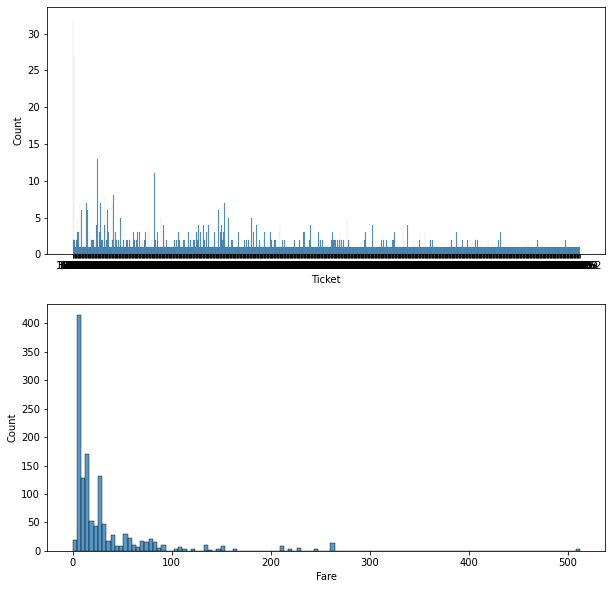

In [ ]:
cardinal=['Ticket','Fare']
fig=plt.figure(figsize=(10,10))
for i,var in enumerate(cardinal):
  fig.add_subplot(2,1,i+1)
  sns.histplot(data=df[var])

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer 
discretizer=KBinsDiscretizer(n_bins=6,encode='ordinal',strategy='quantile') #3lines turns numerical into bins
ticket=discretizer.fit_transform(df['Ticket'].values.reshape(-1,1))
df['Ticket']=pd.Series(ticket.reshape(-1))
df['Ticket'].value_counts()

4.0    233
5.0    226
3.0    220
0.0    214
2.0    211
1.0    205
Name: Ticket, dtype: int64

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer 
discretizer=KBinsDiscretizer(n_bins=6,encode='ordinal',strategy='quantile')
fare=discretizer.fit_transform(df['Fare'].values.reshape(-1,1))
df['Fare']=pd.Series(fare.reshape(-1))
df['Fare'].value_counts()

4.0    255
1.0    232
5.0    218
2.0    215
0.0    201
3.0    188
Name: Fare, dtype: int64

##4) Feature selection

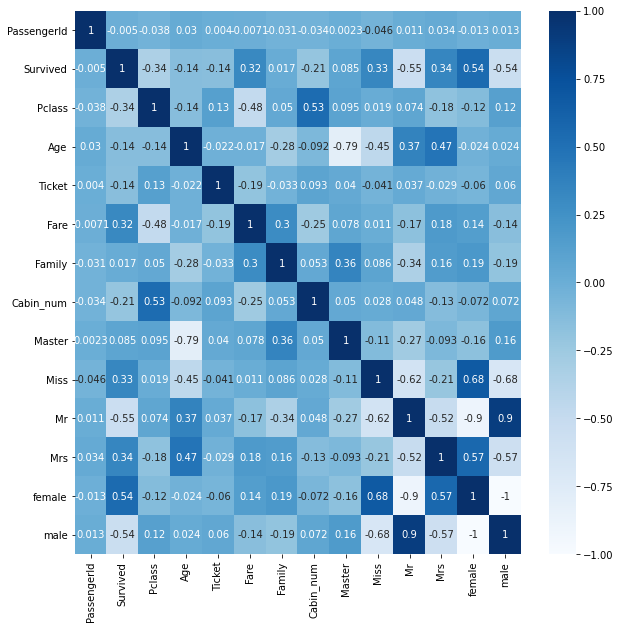

In [ ]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

In [ ]:
df.drop(['male'],axis=1,inplace=True)

#3.Modeling

In [ ]:
test_df=df.loc[df['Survived'].isnull()==1].drop('Survived',axis=1) 
train_df=df.loc[df['Survived'].isnull()==0]
titanic_feature=train_df.drop(['Survived','PassengerId'], axis=1) 
titanic_label=train_df['Survived']
titanic_feature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     891 non-null    int64  
 1   Age        891 non-null    float64
 2   Ticket     891 non-null    float64
 3   Fare       891 non-null    float64
 4   Family     891 non-null    int64  
 5   Cabin_num  891 non-null    float64
 6   Master     891 non-null    uint8  
 7   Miss       891 non-null    uint8  
 8   Mr         891 non-null    uint8  
 9   Mrs        891 non-null    uint8  
 10  female     891 non-null    uint8  
dtypes: float64(4), int64(2), uint8(5)
memory usage: 53.1 KB


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
rf_clf=RandomForestClassifier(random_state=0) 
xgb_clf=XGBClassifier(random_state=0)
X_train, X_test, y_train, y_test=train_test_split(titanic_feature, titanic_label, test_size=0.2,random_state=0)

In [ ]:
rf_params={'n_estimators':[50,100,150,200],
           'max_depth':[3,5,7], 
           'min_samples_leaf':[3,5,7],
           'min_samples_split':[5,7,9]}
rf_gridcv=GridSearchCV(rf_clf, param_grid=rf_params, cv=5, n_jobs=-1) 
rf_gridcv.fit(X_train, y_train)
print('best parameters:\n',rf_gridcv.best_params_)
rf_clf=rf_gridcv.best_estimator_

best parameters:
 {'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 150}


In [ ]:
xgb_params={'learning_rate' : [0.02], 
            'n_estimators':[200,300,400,500],
            'max_depth':[3,5,7],
            'colsample_bytree':[0.7,0.8],
            'subsample':[0.9]}
xgb_gridcv=GridSearchCV(xgb_clf, param_grid=xgb_params, cv=5, n_jobs=-1) 
xgb_gridcv.fit(X_train, y_train)
print('best parameters:\n',xgb_gridcv.best_params_)
xgb_clf=xgb_gridcv.best_estimator_

best parameters:
 {'colsample_bytree': 0.7, 'learning_rate': 0.02, 'max_depth': 7, 'n_estimators': 400, 'subsample': 0.9}


In [ ]:
vo_clf=VotingClassifier(estimators=[('RandomForest',rf_clf),('XGBoost',xgb_clf)], voting='soft')
pred1=rf_clf.fit(X_train, y_train).predict(X_test)
pred2=xgb_clf.fit(X_train, y_train).predict(X_test)
pred3=vo_clf.fit(X_train, y_train).predict(X_test)
print('Accuracy1:{0:.4f} / Accuracy2:{1:.4f}'.format(accuracy_score(y_test,pred1),accuracy_score(y_test,pred2)))
print('Final accuracy:{0:.4f}'.format(accuracy_score(y_test,pred3))) 

Accuracy1:0.8324 / Accuracy2:0.8715
Final accuracy:0.8380


In [ ]:
Pid=test_df['PassengerId']
test_df.drop('PassengerId',axis=1,inplace=True)
test_df.head(3)

,Pclass,Age,Ticket,Fare,Family,Cabin_num,Master,Miss,Mr,Mrs,female
0,3,30.0,0.0,0.0,0,51.5,0,0,1,0,0
1,3,35.5,2.0,5.0,1,51.5,0,0,0,1,1
2,2,30.0,0.0,1.0,0,33.0,0,0,1,0,0


In [ ]:
realpred=vo_clf.predict(test_df)
realpred=pd.DataFrame(realpred, columns=['Survived']) 
submit_df=pd.DataFrame({'PassengerId':Pid,'Survived':realpred['Survived']}) 
submit_df.head(3)

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0


In [ ]:
submit_df['Survived'].astype(int) #got 0 points!

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    1
Name: Survived, Length: 418, dtype: int64

In [ ]:
submit_df.to_csv('/content/gdrive/MyDrive/Dataset/Lutris_titanic.csv', index = False)